In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from pathlib import Path
from tqdm import tqdm
from tabulate import tabulate

In [47]:
eps = ['0.001', '0.005', '0.01', '0.05', '0.1', '0.2', '0.3']
offset_eps = ['0.003', '0.008', '0.048', '0.098', '0.198', '0.298']
offset_eps_2 = ['0.004', '0.009', '0.049', '0.099', '0.199', '0.299']
offset_eps_3 = ['0.0005', '0.0045', '0.0095', '0.0495', '0.0995', '0.1995', '0.2995']

In [48]:
all_dir = Path('../chains/chain_data/LA_SS_offsets/20210608')

In [49]:
num_plans = list(all_dir.glob('*'))[0].name.split('_')[3]

In [50]:
data = dict()
for ep in tqdm(eps):
    try:
        eps_path = all_dir / f'LA_SS_bg_{num_plans}_dp_all_{ep}.csv'
        data[ep] = pd.read_csv(eps_path)
    except FileNotFoundError:
        print(f'File not found: {eps_path}')

100%|██████████| 7/7 [00:01<00:00,  6.19it/s]


In [51]:
offset_data = dict()
for ep in tqdm(offset_eps):
    try:
        eps_path = all_dir / f'LA_SS_bg_{num_plans}_dp_all_{ep}.csv'
        offset_data[ep] = pd.read_csv(eps_path)
    except FileNotFoundError:
        print(f'File not found: {eps_path}')

100%|██████████| 6/6 [00:00<00:00,  7.15it/s]


In [52]:
offset_data_2 = dict()
for ep in tqdm(offset_eps_2):
    try:
        eps_path = all_dir / f'LA_SS_bg_{num_plans}_dp_all_{ep}.csv'
        offset_data_2[ep] = pd.read_csv(eps_path)
    except FileNotFoundError:
        print(f'File not found: {eps_path}')

100%|██████████| 6/6 [00:01<00:00,  4.14it/s]


In [53]:
offset_data_3 = dict()
for ep in tqdm(offset_eps_3):
    try:
        eps_path = all_dir / f'LA_SS_bg_{num_plans}_dp_all_{ep}.csv'
        offset_data_3[ep] = pd.read_csv(eps_path)
    except FileNotFoundError:
        print(f'File not found: {eps_path}')

100%|██████████| 7/7 [00:01<00:00,  4.29it/s]


In [54]:
def get_pop_bal(df, dtype='dp'):
    dp = df.filter(regex='^TOTPOP'+dtype)
    num_dists = dp.shape[1]
    totpop = dp.iloc[0].sum()
    ideal_pop = totpop / num_dists
    return (dp - ideal_pop).abs().max(axis=1) / ideal_pop * 100

In [55]:
sf_pop_bals = [get_pop_bal(df, dtype='sf') for df in data.values()]
dp_pop_bals = [get_pop_bal(df, dtype='dp') for df in data.values()]
offset_sf_pop_bals = [get_pop_bal(df, dtype='sf') for df in offset_data.values()]
offset_dp_pop_bals = [get_pop_bal(df, dtype='dp') for df in offset_data.values()]
offset_sf_pop_bals_2 = [get_pop_bal(df, dtype='sf') for df in offset_data_2.values()]
offset_dp_pop_bals_2 = [get_pop_bal(df, dtype='dp') for df in offset_data_2.values()]
offset_sf_pop_bals_3 = [get_pop_bal(df, dtype='sf') for df in offset_data_3.values()]
offset_dp_pop_bals_3 = [get_pop_bal(df, dtype='dp') for df in offset_data_3.values()]

In [56]:
(sf_pop_bals[0] > 0.5).mean()

0.0

In [57]:
sf_invalid = [(sf > (float(ep) * 100)).mean() for sf, ep in zip(sf_pop_bals, eps)]
dp_invalid = [(dp > (float(ep) * 100)).mean() for dp, ep in zip(dp_pop_bals, eps)]
offset_sf_invalid = [(sf > (float(ep) * 100)).mean() for sf, ep in zip(offset_sf_pop_bals, eps[1:])]
offset_dp_invalid = [(dp > (float(ep) * 100)).mean() for dp, ep in zip(offset_dp_pop_bals, eps[1:])]
offset_sf_invalid_2 = [(sf > (float(ep) * 100)).mean() for sf, ep in zip(offset_sf_pop_bals_2, eps[1:])]
offset_dp_invalid_2 = [(dp > (float(ep) * 100)).mean() for dp, ep in zip(offset_dp_pop_bals_2, eps[1:])]
offset_sf_invalid_3 = [(sf > (float(ep) * 100)).mean() for sf, ep in zip(offset_sf_pop_bals_3, eps)]
offset_dp_invalid_3 = [(dp > (float(ep) * 100)).mean() for dp, ep in zip(offset_dp_pop_bals_3, eps)]

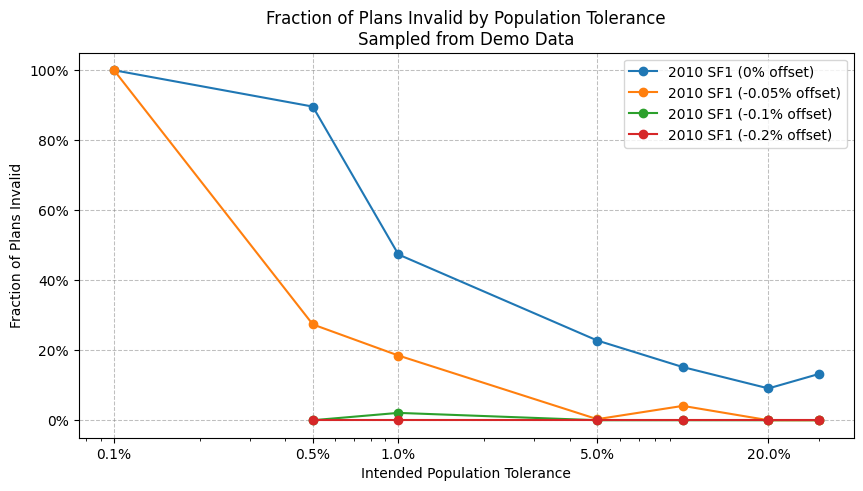

In [58]:
eps_labels = list(map(float,eps))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(eps_labels, sf_invalid, 'o-', label='2010 SF1 (0% offset)')
ax.plot(eps_labels, offset_sf_invalid_3, 'o-', label='2010 SF1 (-0.05% offset)')
ax.plot(eps_labels[1:], offset_sf_invalid_2, 'o-', label='2010 SF1 (-0.1% offset)')
ax.plot(eps_labels[1:], offset_sf_invalid, 'o-', label='2010 SF1 (-0.2% offset)')
plt.xscale('log')
plt.xlabel('Intended Population Tolerance')
plt.ylabel('Fraction of Plans Invalid')

ax.set_xticks([0.001, 0.005, 0.01, 0.05, 0.2])

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

ax.grid(visible=True, color='grey', linestyle='--', linewidth=0.75, alpha=0.5)
ax.set_title('Fraction of Plans Invalid by Population Tolerance\nSampled from Demo Data')
plt.legend()
plt.show()

In [59]:
# Find StDev of plan with 5% population tolerance
csv = data['0.05'].copy()
csv = csv.loc[:,~csv.columns.str.contains('num_b|NH_BLACK')]
csv = csv.loc[:,~csv.columns.str.contains('.1', regex=False)]
        
cols = csv.columns 
n_dists = max({int(x.split('_')[-1]) for x in cols})    

dists = range(1, n_dists+1)
all_dists = pd.concat([csv.filter(regex=f'_{dist_num}$').set_axis(['TOTPOPsf', 'TOTPOPdp'], axis=1) 
                    for dist_num in dists])
all_dists = all_dists.reset_index(drop=True)

all_dists['err'] = all_dists.TOTPOPdp - all_dists.TOTPOPsf

no_offset_std = all_dists['err'].std()

In [60]:
# Find the ideal population for each district
sf = csv[csv.columns[csv.columns.str.contains('sf')]]
total_pop = sf.sum(axis=1).unique()[0]
ideal_pop = total_pop / n_dists

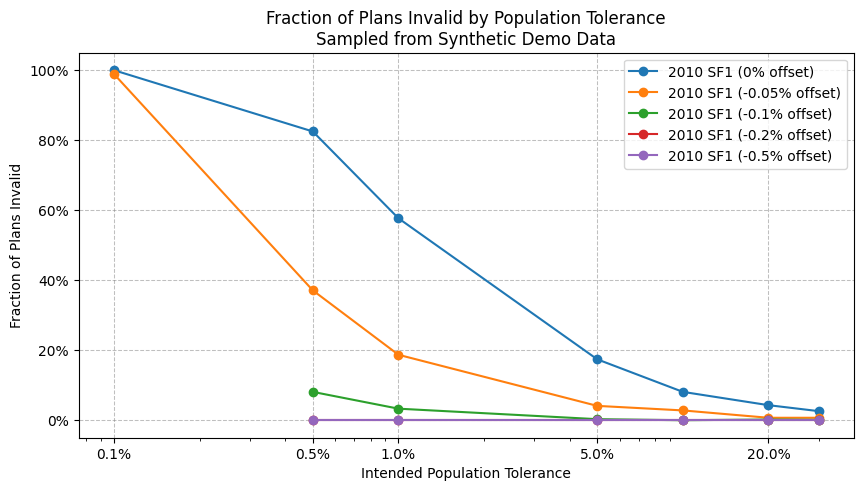

In [61]:
n_plans = int(num_plans)
dists_per_plan = n_dists
pop_tol = 0.05
ideal_pop = int(ideal_pop)

lines = []
pop_tols = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
for offset in [0.0, 0.0005, 0.001, 0.002, 0.005]:
    line = []
    for pop_tol in pop_tols:
        dists = np.random.uniform(ideal_pop * (1 - (max(0,pop_tol - offset))), ideal_pop * (1 + (max(0,pop_tol - offset))), (n_plans, dists_per_plan))
        dist_errors = np.random.normal(0, no_offset_std, (n_plans, dists_per_plan))
        noisy_plans = dists + dist_errors
        line.append((np.abs(noisy_plans - ideal_pop).max(axis=1) > ideal_pop * pop_tol).mean())
    lines.append(line)

fig,ax = plt.subplots(figsize=(10, 5))
plt.plot(pop_tols, lines[0], 'o-', label='2010 SF1 (0% offset)')
plt.plot(pop_tols, lines[1], 'o-', label='2010 SF1 (-0.05% offset)')
plt.plot(pop_tols[1:], lines[2][1:], 'o-', label='2010 SF1 (-0.1% offset)')
plt.plot(pop_tols[1:], lines[3][1:], 'o-', label='2010 SF1 (-0.2% offset)')
plt.plot(pop_tols[1:], lines[4][1:], 'o-', label='2010 SF1 (-0.5% offset)')
plt.xscale('log')
plt.xlabel('Intended Population Tolerance')
plt.ylabel('Fraction of Plans Invalid')

ax.set_xticks([0.001, 0.005, 0.01, 0.05, 0.2])

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

ax.grid(visible=True, color='grey', linestyle='--', linewidth=0.75, alpha=0.5)
ax.set_title('Fraction of Plans Invalid by Population Tolerance\nSampled from Synthetic Demo Data')
plt.legend()
plt.show()

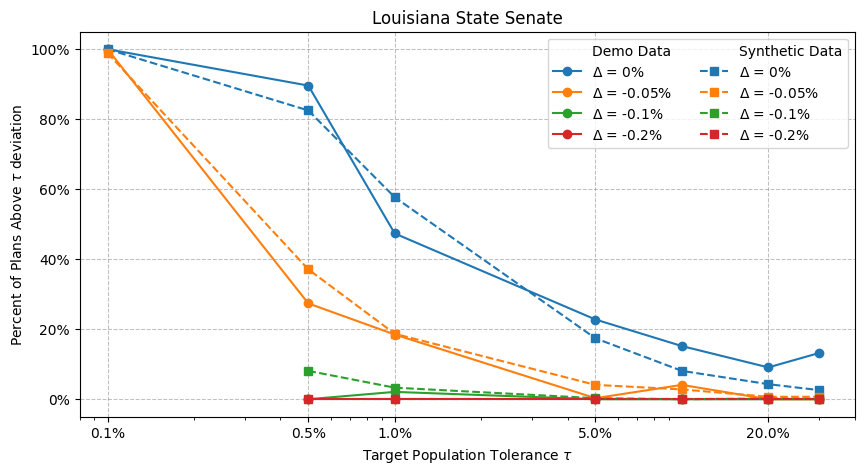

In [64]:
eps_labels = list(map(float,eps))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(eps_labels, sf_invalid, 'o-', label='$\\Delta$ = 0%')
ax.plot(eps_labels, offset_sf_invalid_3, 'o-', label='$\\Delta$ = -0.05%')
ax.plot(eps_labels[1:], offset_sf_invalid_2, 'o-', label='$\\Delta$ = -0.1%')
ax.plot(eps_labels[1:], offset_sf_invalid, 'o-', label='$\\Delta$ = -0.2%')
plt.xscale('log')
plt.xlabel('Target Population Tolerance $\\tau$')
plt.ylabel('Percent of Plans Above $\\tau$ deviation')

ax.set_prop_cycle(None)

plt.plot(pop_tols, lines[0], 's--', label='$\\Delta$ = 0%')
plt.plot(pop_tols, lines[1], 's--', label='$\\Delta$ = -0.05%')
plt.plot(pop_tols[1:], lines[2][1:], 's--', label='$\\Delta$ = -0.1%')
plt.plot(pop_tols[1:], lines[3][1:], 's--', label='$\\Delta$ = -0.2%')

ax.set_xticks([0.001, 0.005, 0.01, 0.05, 0.2])

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

ax.grid(visible=True, color='grey', linestyle='--', linewidth=0.75, alpha=0.5)
ax.set_title('Louisiana State Senate')

h, l = ax.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]*2
handles = [ph[0]] + h[:4] + [ph[1]] + h[4:]
labels = ["Demo Data"] + l[:4] + ["Synthetic Data"] + l[4:]

ax.set_xlim(0.0008, 0.4)
ax.set_ylim(-0.05, 1.05)

plt.legend(handles, labels, ncol=2, loc='upper right')

leg = ax.get_legend()
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.show()